## 라이브러리

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rc("font", family = "Malgun Gothic")

# 부산시 전통시장 활성화 방안

부산시 전통시장 활성화 방안을 제안하기 위한 데이터 전처리 및 시각화, EDA 과정

## 데이터 전처리

「전통시장·상점가및점포경영실태조사」 경영관리현황 - 고객관리 및 서비스 현황, 상거래현대화수준 데이터를 활용하여 전국 전통시장의 편의시설 현황을 분석함


### 화장실/주차장

In [2]:
# 화장실주차장 데이터
# 컬럼명 영문변환 필요
df_toilet = pd.read_csv("./data/전국_시군구별_전통시장_화장실주차장.csv", encoding="utf-8")

# 컬럼정의서 불러오기
df_toilet_col = pd.read_excel("./data/전국_시군구별_전통시장_컬럼정의서.xls")
df_toilet_col

,순서,컬럼영문명,컬럼한글명,데이터타입,길이,PK여부,NOT NULL여부
0,1,ID,ID,VARCHAR,1000,Y,NaN
1,2,LCLAS_NM,대분류명,VARCHAR,5,NaN,NaN
2,3,MLSFC_NM,중분류명,VARCHAR,5,NaN,NaN
3,4,FCLTY_NM,시설명,VARCHAR,30,NaN,NaN
4,5,CTPRVN_NM,시도명,VARCHAR,30,NaN,NaN
5,6,SIGNGU_NM,시군구명,VARCHAR,30,NaN,NaN
6,7,LEGALDONG_CD,법정동코드,VARCHAR,10,NaN,NaN
7,8,LEGALDONG_NM,법정동명,VARCHAR,30,NaN,NaN
8,9,ADSTRD_CD,행정동코드,VARCHAR,9,NaN,NaN
9,10,ADSTRD_NM,행정동명,VARCHAR,30,NaN,NaN


In [3]:
# 영한컬럼명 딕셔너리 형태로 만들기
dict_toilet = dict(zip(df_toilet_col["컬럼영문명"], df_toilet_col["컬럼한글명"]))

# 컬럼명 영문 -> 한글로 변환
df_toilet_kor = df_toilet.rename(columns=dict_toilet)

In [4]:
# 시설명, 시도명, 화장실존재여부, 주차장존재여부 추출
# 행 : 1401행
df_toilet_prk = df_toilet_kor[["시설명", "시도명", "화장실존재여부", "주차장존재여부"]]
df_toilet_prk

,시설명,시도명,화장실존재여부,주차장존재여부
0,강남시장,서울,Y,Y
1,신사상가,서울,Y,N
2,영동전통시장,서울,Y,Y
3,청담삼익시장,서울,Y,Y
4,고분다리전통시장,서울,Y,Y
...,...,...,...,...
1396,마천전통시장,경남,Y,Y
1397,영등포유통상가,서울,Y,Y
1398,고려쇼핑센터,부산,Y,Y
1399,부산광역시철강판매협동조합,부산,N,N


최종 전처리한 화장실/주차장 데이터프레임명은 df_toilet_prk이며 1401행임

### 배달/장보기

In [5]:
# 전국_전통시장_배달장보기
# 행 : 1413행
df_delivery = pd.read_csv("./data/전국_전통시장_배달장보기.csv", encoding="utf-8")

# 인정된 전통시장인 것만 추출
condition = (df_delivery["시장-상점가 구분"] == "전통시장") & (df_delivery["인정여부"] == "인정시장")
df_delivery = df_delivery[condition]
df_delivery.reset_index(inplace=True, drop=True)

del df_delivery["순번"]
df_delivery = df_delivery[["시장-상점가명", "실시여부 - 1) 배송서비스", "실시여부 - 2) 장보기서비스"]]
df_delivery

,시장-상점가명,실시여부 - 1) 배송서비스,실시여부 - 2) 장보기서비스
0,강남시장,2,2
1,신사상가,2,2
2,영동전통시장,1,2
3,청담삼익시장,2,2
4,고분다리전통시장,1,2
...,...,...,...
1408,화개장터,2,2
1409,모슬포중앙시장,2,2
1410,합정시장,2,2
1411,주암시장,2,2


최종 전처리한 배달/장보기 데이터프레임명은 df_delivery이며 1413행임

### 화장실/주차장/배달/장보기 통합

In [6]:
# 화장실주차장과 배달장보기 통합
df_td = pd.merge(left = df_toilet_prk,
                        right = df_delivery,
                        how = "inner",
                        left_on = "시설명",
                        right_on = "시장-상점가명")
del df_td["시장-상점가명"]

df_td = df_td.drop_duplicates(["시설명"], keep="first",ignore_index=True)
df_td

,시설명,시도명,화장실존재여부,주차장존재여부,실시여부 - 1) 배송서비스,실시여부 - 2) 장보기서비스
0,강남시장,서울,Y,Y,2,2
1,신사상가,서울,Y,N,2,2
2,영동전통시장,서울,Y,Y,1,2
3,청담삼익시장,서울,Y,Y,2,2
4,고분다리전통시장,서울,Y,Y,1,2
...,...,...,...,...,...,...
1306,마천전통시장,경남,Y,Y,2,2
1307,영등포유통상가,서울,Y,Y,2,2
1308,고려쇼핑센터,부산,Y,Y,2,2
1309,부산광역시철강판매협동조합,부산,N,N,2,2


### 백분율로 변환

위 데이터들은 Y/N로 표기된 데이터여서 시도별 백분율로 변환해줌

In [7]:
# 화장실백분율
# Y/N로 된 데이터를 지역별 전통시장의 화장실 비율 컬럼으로 변경
temp1=df_td.pivot_table(index="시도명", values="화장실존재여부", aggfunc="count").reset_index()
temp2=df_td[(df_td["화장실존재여부"]=="Y")].pivot_table(index="시도명", values="화장실존재여부", aggfunc="count").reset_index()

temp_toilet = pd.merge(left = temp1,
                        right = temp2,
                        how = "left",
                        left_on = "시도명",
                        right_on = "시도명").fillna(0)

temp_toilet.rename(columns={"시도명":"시도명","화장실존재여부_x":"전체시장", "화장실존재여부_y":"화장실보유시장"},inplace=True) 
temp_toilet["화장실"] = round((temp_toilet["화장실보유시장"] / temp_toilet["전체시장"]) * 100,1)

temp_toilet

,시도명,전체시장,화장실보유시장,화장실
0,강원,56,56,100.0
1,경기,130,118,90.8
2,경남,148,145,98.0
3,경북,127,126,99.2
4,광주,23,21,91.3
5,대구,95,92,96.8
6,대전,27,26,96.3
7,부산,167,153,91.6
8,서울,201,184,91.5
9,세종특별자치시,4,4,100.0


In [8]:
# 주차장백분율
# Y/N로 된 데이터를 지역별 전통시장의 주차장 비율 컬럼으로 변경
temp3=df_td.pivot_table(index="시도명", values="주차장존재여부", aggfunc="count").reset_index()
temp4=df_td[(df_td["주차장존재여부"]=="Y")].pivot_table(index="시도명", values="주차장존재여부", aggfunc="count").reset_index()

temp_park = pd.merge(left = temp3,
                        right = temp4,
                        how = "left",
                        left_on = "시도명",
                        right_on = "시도명").fillna(0)

temp_park.rename(columns={"시도명":"시도명","주차장존재여부_x":"전체시장", "주차장존재여부_y":"주차장보유시장"},inplace=True) 
temp_park["주차장"] = round((temp_park["주차장보유시장"] / temp_park["전체시장"]) * 100,1)
temp_park

,시도명,전체시장,주차장보유시장,주차장
0,강원,56,54,96.4
1,경기,130,112,86.2
2,경남,148,134,90.5
3,경북,127,121,95.3
4,광주,23,22,95.7
5,대구,95,74,77.9
6,대전,27,24,88.9
7,부산,167,102,61.1
8,서울,201,132,65.7
9,세종특별자치시,4,4,100.0


In [9]:
# 배송백분율
# 1/2로 된 데이터를 지역별 전통시장의 배송 비율 컬럼으로 변경
temp5=df_td.pivot_table(index="시도명", values="실시여부 - 1) 배송서비스", aggfunc="count").reset_index()
temp6=df_td[(df_td["실시여부 - 1) 배송서비스"]==1)].pivot_table(index="시도명", values="실시여부 - 1) 배송서비스", aggfunc="count").reset_index()

temp_delivery = pd.merge(left = temp5,
                        right = temp6,
                        how = "left",
                        left_on = "시도명",
                        right_on = "시도명").fillna(0)

temp_delivery.rename(columns={"시도명":"시도명","실시여부 - 1) 배송서비스_x":"전체시장", "실시여부 - 1) 배송서비스_y":"배송서비스시장"},inplace=True) 
temp_delivery["배송"] = round((temp_delivery["배송서비스시장"] / temp_delivery["전체시장"]) * 100,1)
temp_delivery

,시도명,전체시장,배송서비스시장,배송
0,강원,56,2.0,3.6
1,경기,130,9.0,6.9
2,경남,148,2.0,1.4
3,경북,127,12.0,9.4
4,광주,23,2.0,8.7
5,대구,95,1.0,1.1
6,대전,27,0.0,0.0
7,부산,167,7.0,4.2
8,서울,201,37.0,18.4
9,세종특별자치시,4,0.0,0.0


In [10]:
# 장보기백분율
# 1/2로 된 데이터를 지역별 전통시장의 장보기 비율 컬럼으로 변경
temp7=df_td.pivot_table(index="시도명", values="실시여부 - 2) 장보기서비스", aggfunc="count").reset_index()
temp8=df_td[(df_td["실시여부 - 2) 장보기서비스"]==1)].pivot_table(index="시도명", values="실시여부 - 2) 장보기서비스", aggfunc="count").reset_index()

temp_shop = pd.merge(left = temp7,
                        right = temp8,
                        how = "left",
                        left_on = "시도명",
                        right_on = "시도명").fillna(0)

temp_shop.rename(columns={"시도명":"시도명","실시여부 - 2) 장보기서비스_x":"전체시장", "실시여부 - 2) 장보기서비스_y":"장보기서비스시장"},inplace=True) 
temp_shop["장보기"] = round((temp_shop["장보기서비스시장"] / temp_shop["전체시장"]) * 100,1)
temp_shop

,시도명,전체시장,장보기서비스시장,장보기
0,강원,56,0.0,0.0
1,경기,130,2.0,1.5
2,경남,148,1.0,0.7
3,경북,127,2.0,1.6
4,광주,23,0.0,0.0
5,대구,95,1.0,1.1
6,대전,27,0.0,0.0
7,부산,167,3.0,1.8
8,서울,201,12.0,6.0
9,세종특별자치시,4,0.0,0.0


In [11]:
# 화장실,주차장,배송,장보기 Y/N데이터를 시도별 비율 데이터로 변환
temp_toilet["화장실"] = round((temp_toilet["화장실보유시장"] / temp_toilet["전체시장"]) * 100,1)
temp_park["주차장"] = round((temp_park["주차장보유시장"] / temp_park["전체시장"]) * 100,1)
temp_delivery["배송"] = round((temp_delivery["배송서비스시장"] / temp_delivery["전체시장"]) * 100,1)
temp_shop["장보기"] = round((temp_shop["장보기서비스시장"] / temp_shop["전체시장"]) * 100,1)

# 시도별 비율 데이터 열 단위 통합하기
temp_all = pd.merge(left = temp_toilet[["시도명","화장실"]],
                        right = temp_park[["시도명","주차장"]],
                        how = "inner",
                        left_on = "시도명",
                        right_on = "시도명")
temp_all = pd.merge(left = temp_all,
                        right = temp_delivery[["시도명","배송"]],
                        how = "inner",
                        left_on = "시도명",
                        right_on = "시도명")
temp_all = pd.merge(left = temp_all,
                        right = temp_shop[["시도명","장보기"]],
                        how = "inner",
                        left_on = "시도명",
                        right_on = "시도명")

temp_all.iloc[9,0]="세종"
temp_all.iloc[14,0]="제주"

# 화장실/주차장/배송/장보기 통합 데이터프레임
temp_all

,시도명,화장실,주차장,배송,장보기
0,강원,100.0,96.4,3.6,0.0
1,경기,90.8,86.2,6.9,1.5
2,경남,98.0,90.5,1.4,0.7
3,경북,99.2,95.3,9.4,1.6
4,광주,91.3,95.7,8.7,0.0
5,대구,96.8,77.9,1.1,1.1
6,대전,96.3,88.9,0.0,0.0
7,부산,91.6,61.1,4.2,1.8
8,서울,91.5,65.7,18.4,6.0
9,세종,100.0,100.0,0.0,0.0


### 교환/택배/환불/상거래현대화

해당 데이터들은 이미 백분율로 변환되어 있어서 바로 통합

In [12]:
# 전국_전통시장_교환_택배_환불
df_exchange = pd.read_csv("./data/전국_전통시장_교환_택배_환불.csv", encoding="euc-kr")

# 전국_전통시장_상거래현대화
df_pos = pd.read_csv("./data/전국_전통시장_상거래현대화.csv", encoding="euc-kr")

In [13]:
# 교환/환불/상거래현대화 데이터 통합하기
df_service = pd.merge(left = df_exchange,
                        right = df_pos,
                        how = "inner",
                        left_on = "지역",
                        right_on = "지역")
df_service.drop(0, inplace=True)
df_service.reset_index(inplace=True, drop=True)

# 데이터 전체 통합하기
df_service = pd.merge(left = df_service,
                        right = temp_all,
                        how = "inner",
                        left_on = "지역",
                        right_on = "시도명")
del df_service["시도명"]
df_service

,지역,교환,택배서비스,환불,신용카드단말기,POS 기기,인터넷쇼핑몰,온누리상품권,점포홈페이지,화장실,주차장,배송,장보기
0,서울,64.2,53.8,55.6,97.6,16.4,12.7,83.3,15.1,91.5,65.7,18.4,6.0
1,부산,55.8,11.8,42.3,79.0,3.6,1.8,78.4,0.1,91.6,61.1,4.2,1.8
2,대구,68.8,42.9,67.4,81.8,3.0,1.6,92.4,0.8,96.8,77.9,1.1,1.1
3,인천,62.9,23.8,59.5,95.3,9.5,1.1,48.4,1.5,94.7,86.8,18.4,5.3
4,광주,99.1,24.9,99.0,76.7,3.9,0.4,73.6,1.0,91.3,95.7,8.7,0.0
5,대전,66.9,6.5,61.7,97.6,13.4,1.3,76.7,2.4,96.3,88.9,0.0,0.0
6,울산,51.5,18.3,40.4,65.2,9.7,0.5,86.9,0.3,100.0,73.0,8.1,2.7
7,세종,53.1,28.1,50.9,96.6,45.4,2.0,58.7,6.0,100.0,100.0,0.0,0.0
8,경기,66.1,18.9,59.1,95.4,25.6,2.1,73.1,3.5,90.8,86.2,6.9,1.5
9,강원,62.7,35.7,57.3,91.8,6.4,2.7,71.7,2.1,100.0,96.4,3.6,0.0


In [14]:
# 파일 저장
df_service.to_csv("./data/전국_전통시장_편의시설_현황.csv", encoding="euc-kr", index=False)

---

## 데이터 시각화

### 데이터 불러오기

In [15]:
# 전국_전통시장_편의시설전체
df = pd.read_csv("./data/전국_전통시장_편의시설_현황.csv", encoding="euc-kr")
df

,지역,교환,택배서비스,환불,신용카드단말기,POS 기기,인터넷쇼핑몰,온누리상품권,점포홈페이지,화장실,주차장,배송,장보기
0,서울,64.2,53.8,55.6,97.6,16.4,12.7,83.3,15.1,91.5,65.7,18.4,6.0
1,부산,55.8,11.8,42.3,79.0,3.6,1.8,78.4,0.1,91.6,61.1,4.2,1.8
2,대구,68.8,42.9,67.4,81.8,3.0,1.6,92.4,0.8,96.8,77.9,1.1,1.1
3,인천,62.9,23.8,59.5,95.3,9.5,1.1,48.4,1.5,94.7,86.8,18.4,5.3
4,광주,99.1,24.9,99.0,76.7,3.9,0.4,73.6,1.0,91.3,95.7,8.7,0.0
5,대전,66.9,6.5,61.7,97.6,13.4,1.3,76.7,2.4,96.3,88.9,0.0,0.0
6,울산,51.5,18.3,40.4,65.2,9.7,0.5,86.9,0.3,100.0,73.0,8.1,2.7
7,세종,53.1,28.1,50.9,96.6,45.4,2.0,58.7,6.0,100.0,100.0,0.0,0.0
8,경기,66.1,18.9,59.1,95.4,25.6,2.1,73.1,3.5,90.8,86.2,6.9,1.5
9,강원,62.7,35.7,57.3,91.8,6.4,2.7,71.7,2.1,100.0,96.4,3.6,0.0


### 시각화 컬러 지정

In [16]:
colors = ['#8cc7cf', '#61b299', '#cde59b', '#fdce7e' ,'#ffecb9']

### 시도별 교환/환불 비율

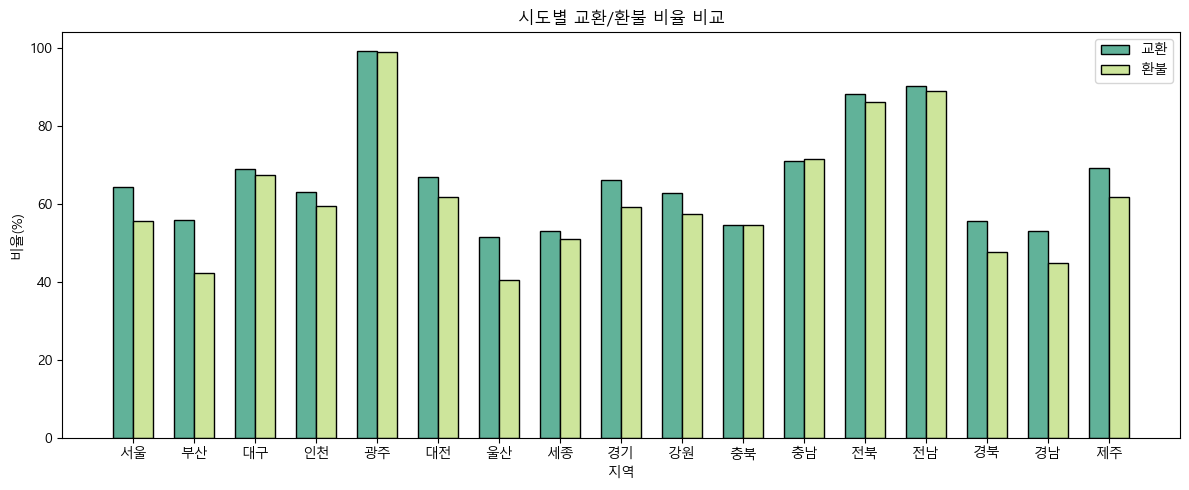

In [17]:
# 교환 환불 서비스를 실시하는 비율을 나타냄

w = 0.33
idx = np.arange(len(df))

plt.figure(figsize = (12, 5))
plt.bar(idx - w/2, df['교환'], width = w, label="교환", color=colors[1],edgecolor='black', linewidth=1)
plt.bar(idx + w/2, df['환불'], width = w, label="환불", color=colors[2],edgecolor='black', linewidth=1)
plt.xticks(idx, df["지역"])
plt.title("시도별 교환/환불 비율 비교")
plt.xlabel("지역")
plt.ylabel("비율(%)")
plt.legend()

plt.tight_layout()
plt.savefig('./savefig/시도별_교환환불_비율.png')

#### 광주시가 교환/환불 비율이 높은 이유
손중호 광주시전통시장상인연합회장은 “시민들이 지역화폐(광주상생카드), 온누리상품권 사용에 불편함이 없도록 가맹점 표시, 상품가격표시, 교환·환불 가능, 위생·청결, 각종 특가세일 실시 등 친절한 시장 분위기 형성에 힘쓰고 있다”며 많은 시민들이 전통시장을 찾아주기를 바란다”고 말했다.<br>
(뉴스기사 : https://www.newsworker.co.kr/news/articleView.html?idxno=60844)

### 시도별 인터넷 서비스 관련 비율

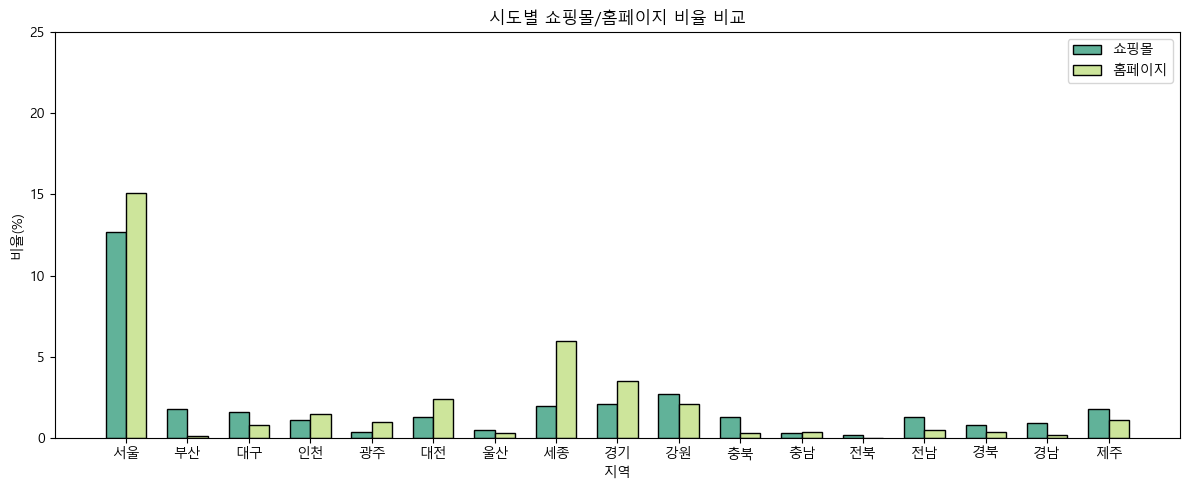

In [18]:
# 인터넷서비스 관련 비율 시각화

w = 0.33
idx = np.arange(len(df))

plt.figure(figsize = (12, 5))
plt.bar(idx - w/2, df['인터넷쇼핑몰'], width = w, label="쇼핑몰", color=colors[1],edgecolor='black', linewidth=1)
plt.bar(idx + w/2, df['점포홈페이지'], width = w, label="홈페이지", color=colors[2],edgecolor='black', linewidth=1)
plt.xticks(idx, df["지역"])
plt.title("시도별 쇼핑몰/홈페이지 비율 비교")
plt.xlabel("지역")
plt.ylabel("비율(%)")
plt.ylim([0,25])
plt.legend()

plt.tight_layout()
plt.savefig('./savefig/시도별_쇼핑몰홈페이지_비율.png')

대부분의 지역이 15% 미만으로 낮은 편임

### 시도별 화장실/주차장 비율

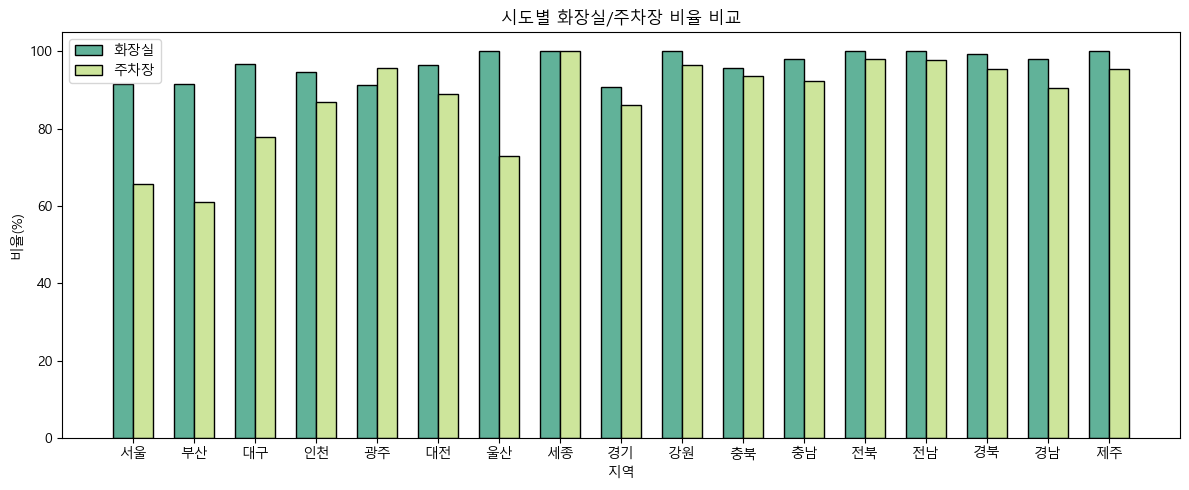

In [19]:
# 편의시설 관련 비율 시각화

w = 0.33
idx = np.arange(len(df))

plt.figure(figsize = (12, 5))
plt.bar(idx - w/2, df['화장실'], width = w, label="화장실", color=colors[1],edgecolor='black', linewidth=1)
plt.bar(idx + w/2, df['주차장'], width = w, label="주차장", color=colors[2],edgecolor='black', linewidth=1)
plt.title("시도별 화장실/주차장 비율 비교")
plt.xlabel("지역")
plt.ylabel("비율(%)")
plt.xticks(idx, df["지역"])
plt.legend()

plt.tight_layout()
plt.savefig('./savefig/시도별_화장실주차장_비율.png')

#### 부산의 주차장 비율이 가장 낮음
부산시 전통시장 활성화 방안 설문조사 확인 결과 '주차장 건립 및 확장' 항목이 가장 높게 나옴<br>
부산의 주차장 비율이 가장 낮은데 실제로 고객들도 주차장이 부족하다는 것을 느끼고 있음

### 시도별 신용카드/상품권 비율

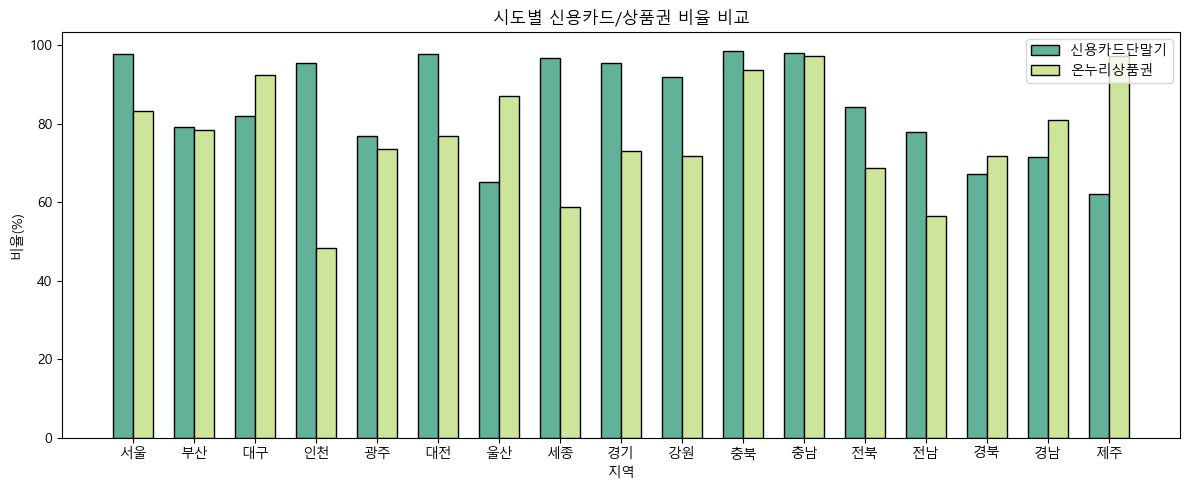

In [20]:
# 거래서비스 관련 시각화

w = 0.33
idx = np.arange(len(df))

plt.figure(figsize = (12, 5))
plt.bar(idx - w/2, df['신용카드단말기'], width = w, label="신용카드단말기", color=colors[1],edgecolor='black', linewidth=1)
plt.bar(idx + w/2, df['온누리상품권'], width = w, label="온누리상품권", color=colors[2],edgecolor='black', linewidth=1)
plt.title("시도별 신용카드/상품권 비율 비교")
plt.xlabel("지역")
plt.ylabel("비율(%)")
plt.xticks(idx, df["지역"])
plt.legend()

plt.tight_layout()
plt.savefig('./savefig/시도별_신용카드상품권_비율.png')

신용카드 단말기는 제주가 62%로 가장 낮고, 온누리상품권은 인천이 48.4%로 가장 낮음<br>
부산은 다른 지역에 비해 둘 다 중간 정도의 비율로 나타남


### 시도별 배송/장보기 비율

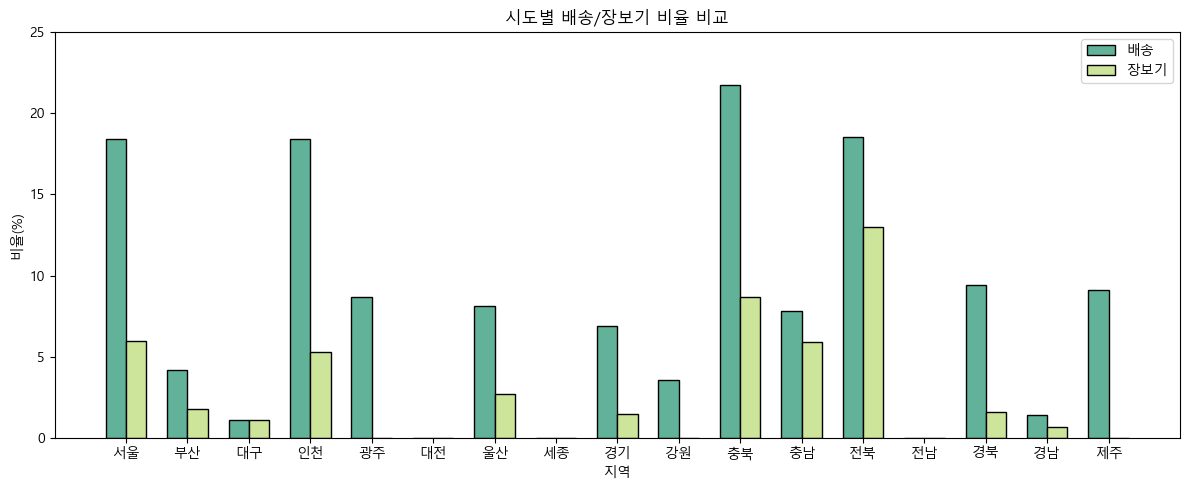

In [21]:
# 배송서비스 관련 비율 시각화

w = 0.33
idx = np.arange(len(df))

plt.figure(figsize = (12, 5))
plt.bar(idx - w/2, df['배송'], width = w, label="배송", color=colors[1],edgecolor='black', linewidth=1)
plt.bar(idx + w/2, df['장보기'], width = w, label="장보기", color=colors[2],edgecolor='black', linewidth=1)
plt.xticks(idx, df["지역"])
plt.title("시도별 배송/장보기 비율 비교")
plt.xlabel("지역")
plt.ylabel("비율(%)")
plt.ylim([0,25])
plt.legend()

plt.tight_layout()
plt.savefig('./savefig/시도별_배송장보기_비율.png')

전국적으로 배송, 장보기 서비스는 잘 갖춰지지 않음<br>
부산은 다른 지역에 비해 배송, 장보기 서비스 비율이 낮은 편
